# Data Visualization: College Majors & Earnings

A mini project to practice data visualization using pandas. The dataset is from the American Community Survey and fetched from [this page](https://github.com/fivethirtyeight/data/tree/master/college-majors) and contains data from 2010-2012. Will be answering questions such as 

* Do students in more popular majors make more money?
* How many majors are predominantly male? Predominantly female?
* Which category of majors have the most students?

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read dataset into the frame and see what it looks like
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
# understand data structure
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [7]:
# descriptive statistics
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [8]:
# drop rows with missing values so that we can use matplotlib
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print('raw data count = ',raw_data_count,'\ncleaned data count = ',cleaned_data_count)

raw data count =  173 
cleaned data count =  172


So far, we have had a first look at the dataset and dropped missing values to prep the dataset for plotting.

## Scatter Plots

We will use scatter plots to explore the following questions:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

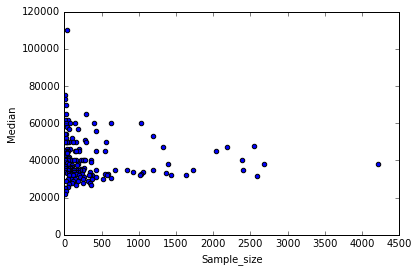

In [7]:
# generate scatterplots to explore relations
recent_grads.plot(x='Sample_size',y='Median',kind='scatter', xlim=(0,4500), ylim=(0,120000));

To answer the first question--*Do students in more popular majors make more money?*--, there seems to be no significant relationship between the popularity of a major and its median salary. 

Now, onto the next question: *Is there any link between the number of full-time employees and median salary?*

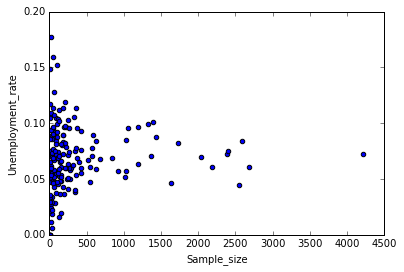

In [8]:
# generate scatterplot
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',xlim=(0,4500),ylim=(0,0.2));

Looks like there could be more variation in the unemployment rate for lower sample size; but there is no significant relationship between the sample size and unemployment rate. 

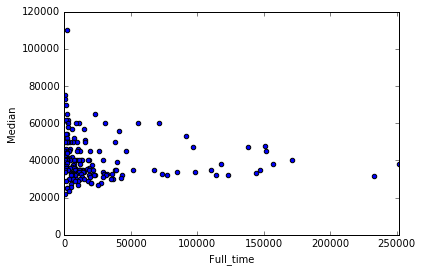

In [11]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter', xlim=(0,252000), ylim=(0,120000));

The number of full-time employees also doesn't seem to have any significant relationship with the median salary. 

Now, onto the next question: *Do students that majored in subjects that were majority female make more money?*

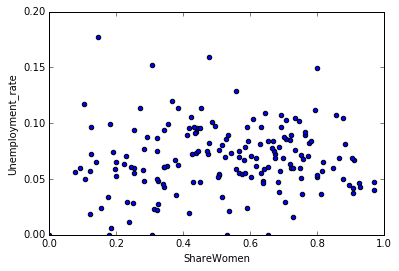

In [15]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter', xlim=(0,1), ylim=(0,0.2));

The percentage of female students majoring in a subject doesn't seem to have any significant relationship with unemployment rate. 

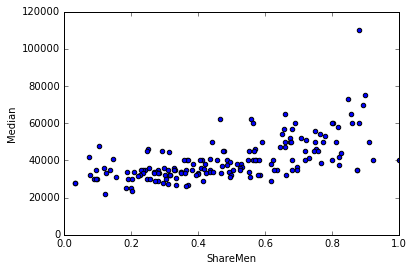

In [18]:
recent_grads['ShareMen'] = recent_grads['Men']/recent_grads['Total'];
recent_grads.plot(x='ShareMen',y='Median',kind='scatter',xlim=(0,1),ylim=(0,120000));

Although, as we can see above, the share of men in a major seems to have a slight effect on the median salary. 

Observations:

* The popularity of a major does not have any significant relationship to median salary.
* So does the number of full-time employees. 
* Whether the major was more female dominated or not is not strongly correlated to median salary. However, the percentage of male students seems to have a slight positive correlation to median salary.

## Explore Data Distributions Using Histograms
We will use histograms to explore the following questions:

* What percent of majors are predominantly male? Predominantly female?
* What's the most common median salary range?

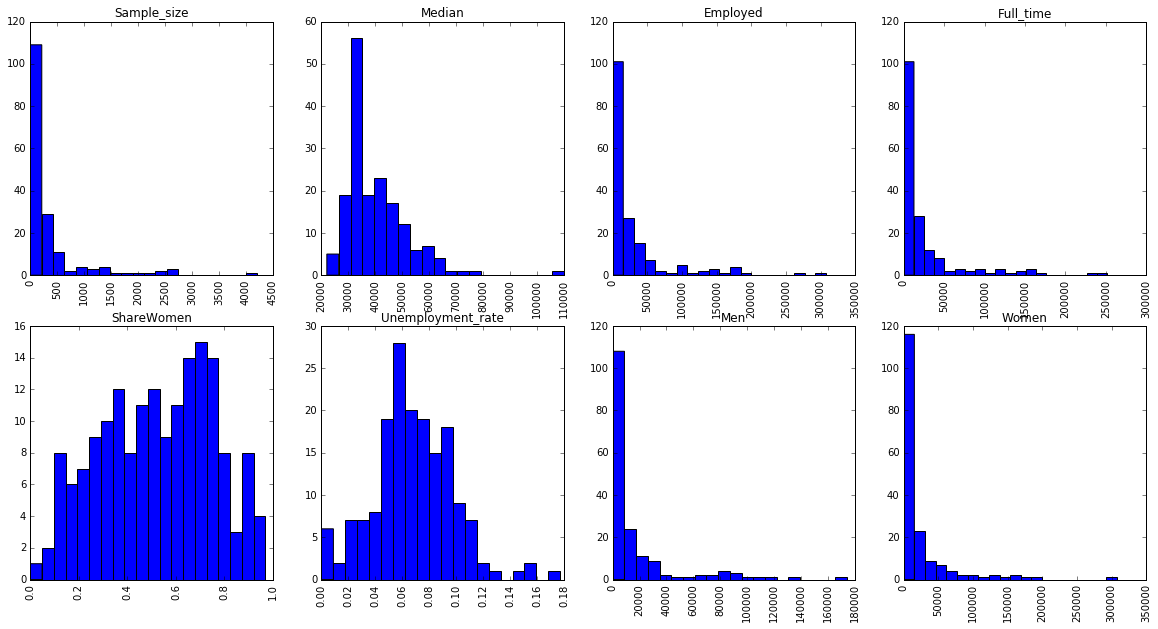

In [21]:
# generate histograms to explore data distribution
fig = plt.figure(figsize=(20,10))
cols = ['Sample_size','Median','Employed','Full_time','ShareWomen','Unemployment_rate','Men','Women']
for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    column = cols[i]
    ax.hist(recent_grads[column],bins=20)
    ax.set_title(column)
    plt.xticks(rotation=90)
plt.show()

It looks like we can benefit from modifying these histograms. First, let's see what percent of majors are predominantly male/female. Let's say, 'predominantly male/female' means 70% or more of the students are male/female. Based on this. What we have to do is:

* create histograms of ShareWomen and ShareMen
* set the number of bins to be 10
* add the top 3 bins in each histogram to find out what percent of majors are predominantly male/female.

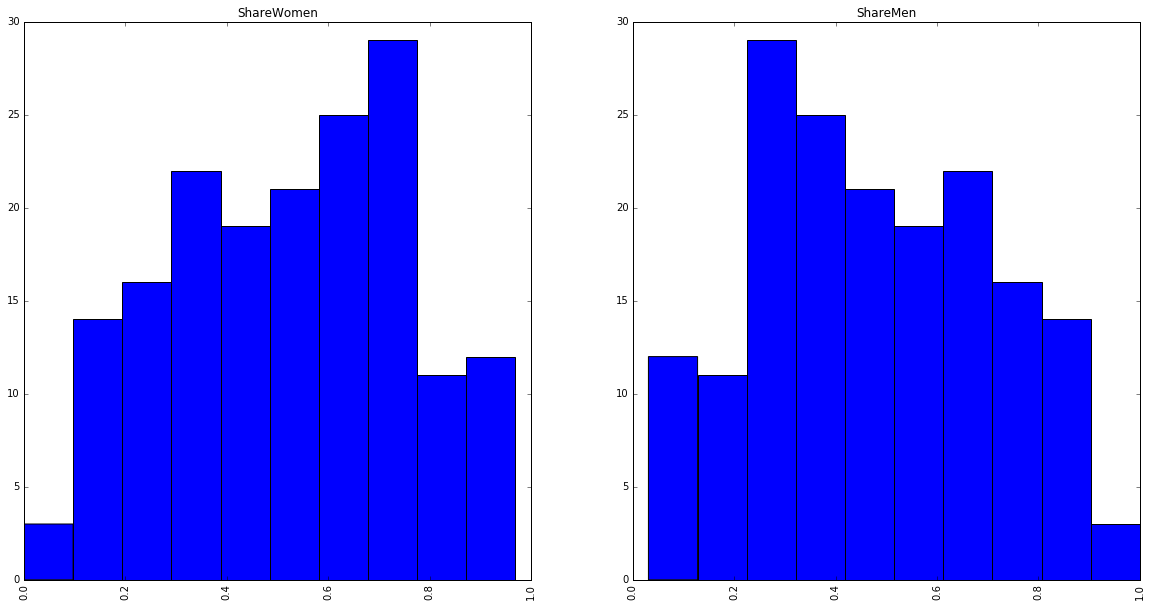

In [26]:
# scatterplot 
fig = plt.figure(figsize=(20,10))
cols = ['ShareWomen','ShareMen']
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    column = cols[i]
    ax.hist(recent_grads[column],bins=10)
    ax.set_title(column)
    plt.xticks(rotation=90)
plt.show()

There are about 10+12+28 = 50 majors that are predominantly female and 3+14+15 = 32 majors that are predominantly male. Dividing this by 172, we have that around 29% of majors are predominantly female and that about 19% of majors are predominantly male.

Now, to explore the question of the most common median salary range, let's take a look at the histogram. 

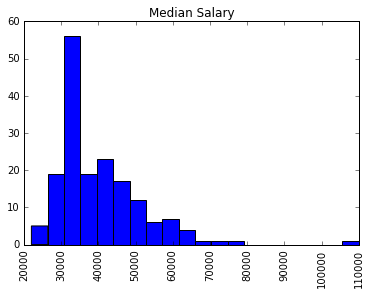

In [31]:
# draw histogram
fig,ax = plt.subplots()
ax.hist(recent_grads['Median'],bins=20)
ax.set_title('Median Salary')
plt.xticks(rotation=90)
plt.show()

We can see that the most common median salary range is $30,000 ~ $35,000.

## Scatter Matrix Plot:
### Visualize Potential Relationships and Distributions Simultaneously

We want to look at the distribution of each variable as well as potential relationships between the two variables. So we will use scatter matrix plots, with the questions from the last section in mind.

In [32]:
# import what we need
from pandas.plotting import scatter_matrix 

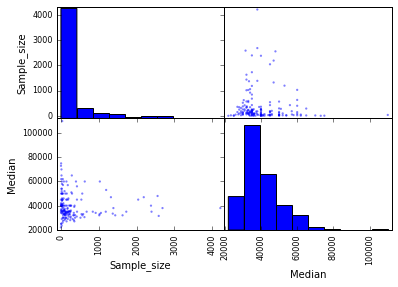

In [33]:
# create a 2x2 scatter matrix plot using Sample_size and Median salary
scatter_matrix(recent_grads[["Sample_size", "Median"]]);

Like we confirmed before with scatter plots before, there is no significant relationship between median salary and sample size. However, it is interesting to note that, the highest median salaries occur not at the more populat majors but at less popular ones. 

Now let's try a 3-by-3 scatter matrix.

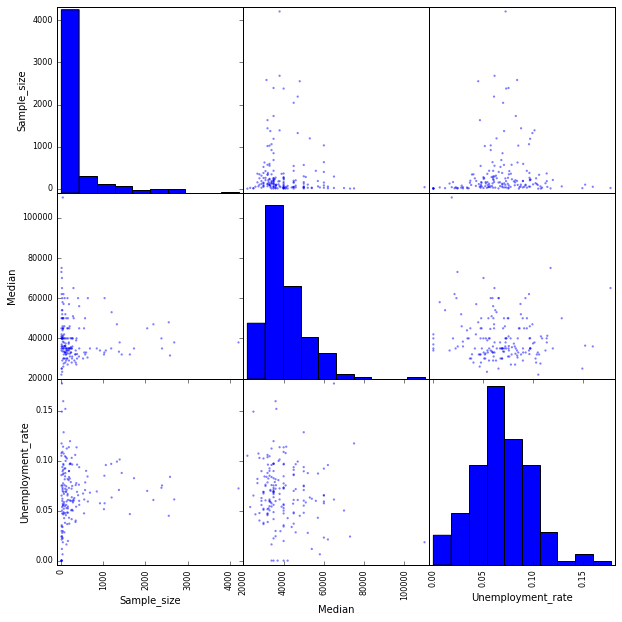

In [34]:
# create a 3x3 scatter matrix plot using Sample_size, Median, and Unemployment_rate
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10));

## Bar Plots

Using bar plots we will 

* compare the percentages of women from the first 10 rows and last 10 rows of the dataframe
* compare the unemployment rate from the first ten rows and last ten rows of the dataframe

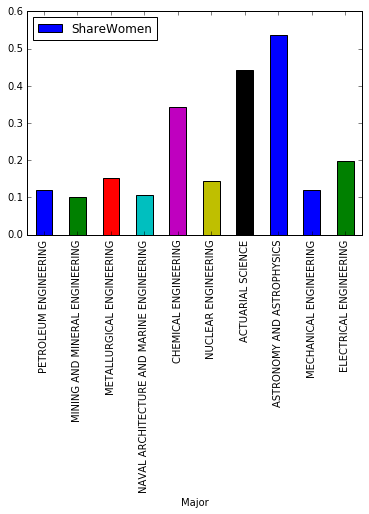

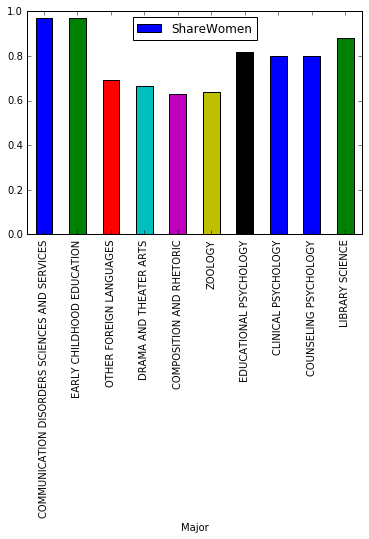

In [40]:
# first 10 rows
recent_grads[:10].plot.bar(x = 'Major',y='ShareWomen');
# last 10 rows
recent_grads[-10:].plot.bar(x = 'Major',y='ShareWomen');

We can see that the first 10 rows contain majors where the share of women are relatively low. On the other hand, the last 10 rows consist of majors that are predominantly female. Knowing that the dataset is sorted by median salary, we can see that the share of women in the high-paying majors are much lower than that in the low-paying majors. 

Next, we will use bar plots to compare the unemployment rates.

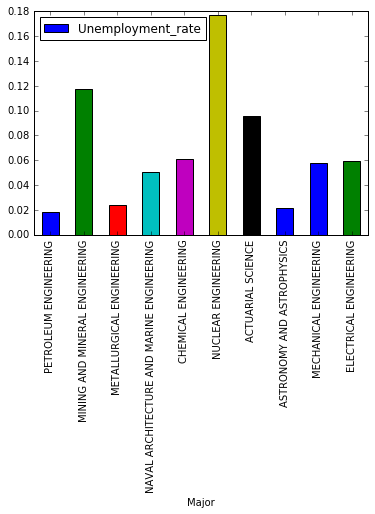

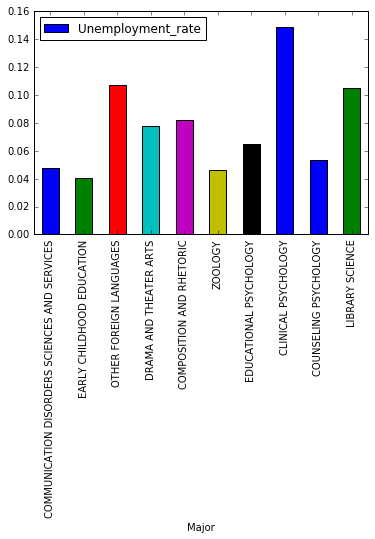

In [41]:
# first 10 rows
recent_grads[:10].plot.bar(x = 'Major',y='Unemployment_rate');
# last 10 rows
recent_grads[-10:].plot.bar(x = 'Major',y='Unemployment_rate');

From the top barplot, we can see that the unemployment rate is relatively higher for nuclear engineering and mineral sciences (and maybe include actuarial science). Otherwise, the unemployment rates are low. 

The bottom barplot shows that the 10 majors with lower median salaries generally also have higher unemployment rates, although none of them have an unemployment rate as high as that of nuclear engineering. 